# Siamese Networks

In [2]:
import tensorflow
from matplotlib import pyplot
from keras.datasets import cifar10
from emnist import extract_training_samples
from tensorflow.keras import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

%matplotlib inline


## utils

In [3]:

def print_history_chart(history):
    accuracy =history.history['accuracy']
    val_accuracy =history.history['val_accuracy']
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(range(1,len(accuracy)+1),accuracy,color='red',label = "Training Accuracy")
    plt.plot(range(1,len(accuracy)+1),val_accuracy,color='blue',label = "Validation Accuracy")
    plt.ylabel('accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(range(1,len(accuracy)+1),loss,color='red',label = "Training Loss")
    plt.plot(range(1,len(accuracy)+1),val_loss,color='blue',label = "Validation Loss")
    plt.ylabel('Cross Entropy')
    plt.title('Model')
    plt.legend()
    plt.title('Training and Validation Loss')

In [4]:

def show_dataset(x_train):
    img_rows, img_cols = x_train.shape[1], x_train.shape[2]
    col1 = 10
    row1 = 1

    # Show a few sample digits from the training set
    plt.rcParams['figure.figsize'] = (1.0, 1.0) # set default size of plots
    col2 = 20
    row2 = 5
    fig = plt.figure(figsize=(col2, row2))
    for index in range(col1*row1, col1*row1 + col2*row2):
        fig.add_subplot(row2, col2, index - col1*row1 + 1)
        plt.axis('off')
        plt.imshow(x_train[index]) # index of the sample picture
    plt.show()
    


In [5]:
EPOCHS = 10 # parameter for model.fit. It is here just for my convenience 

# Vanilla Network

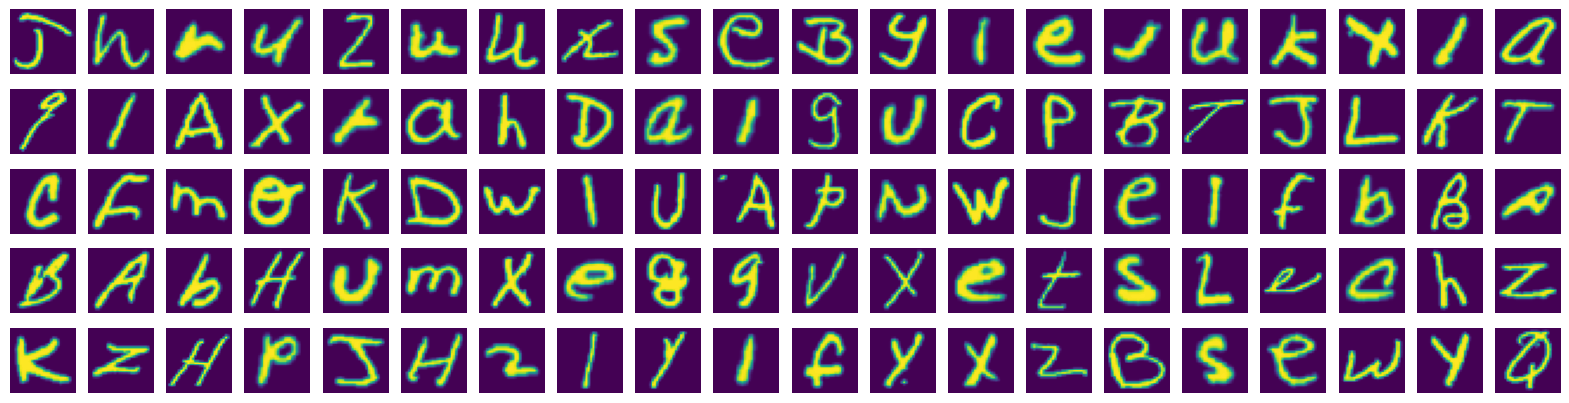

(124800, 28, 28, 1)
26


2024-06-13 19:20:00.601680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 612 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,414,938 (20.66 MB)

 Trainable params: 5,414,938 (20.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
images, labels = extract_training_samples('letters')
images.astype('float32') 
show_dataset(images)

images = images/255.
img_rows, img_cols = images.shape[1:3]
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
print(images.shape)

num_classes = np.size(np.unique(labels)) 
print(num_classes)
labels = utils.to_categorical(labels-1, num_classes) 


x_train, x_rem, y_train, y_rem = train_test_split(images,labels, train_size=0.8)
test_size = 0.5
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.8)



model1 = models.Sequential()
model1.add(Input(shape=(images.shape[1],images.shape[2],1)  ))
model1.add(layers.Conv2D(32, (3, 3), activation='relu',))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(num_classes, activation='softmax'))


print(model1.summary())


model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=EPOCHS)

Epoch 1/10


I0000 00:00:1718299201.889361  389736 service.cc:145] XLA service 0x77f56c015d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718299201.889395  389736 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-13 19:20:01.913421: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-13 19:20:02.003272: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1718299202.896649  389784 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_418', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1718299202.971645  389795 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_418', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:17

 39/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3826 - loss: 2.1616

I0000 00:00:1718299204.878935  389736 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


780/780 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7950 - loss: 0.6807 - val_accuracy: 0.9241 - val_loss: 0.2301
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9363 - loss: 0.1829 - val_accuracy: 0.9329 - val_loss: 0.2005
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9505 - loss: 0.1350 - val_accuracy: 0.9298 - val_loss: 0.2171
Epoch 4/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9590 - loss: 0.1067 - val_accuracy: 0.9370 - val_loss: 0.2081
Epoch 5/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9676 - loss: 0.0798 - val_accuracy: 0.9382 - val_loss: 0.2096
Epoch 6/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9711 - loss: 0.0706 - val_accuracy: 0.9328 - val_loss: 0.2480
Epoch 7/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9729 - loss: 0.0628 - val_accuracy: 0.9339 - val_loss: 0.2517
Epoch 8/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9769 - loss: 0.0547 - val_accuracy: 0.9350 - val_

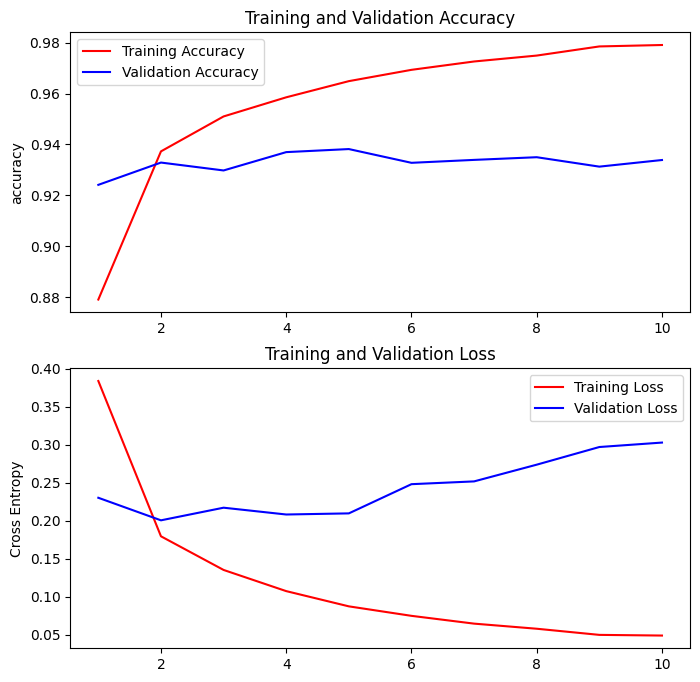

In [8]:
print_history_chart(history1)

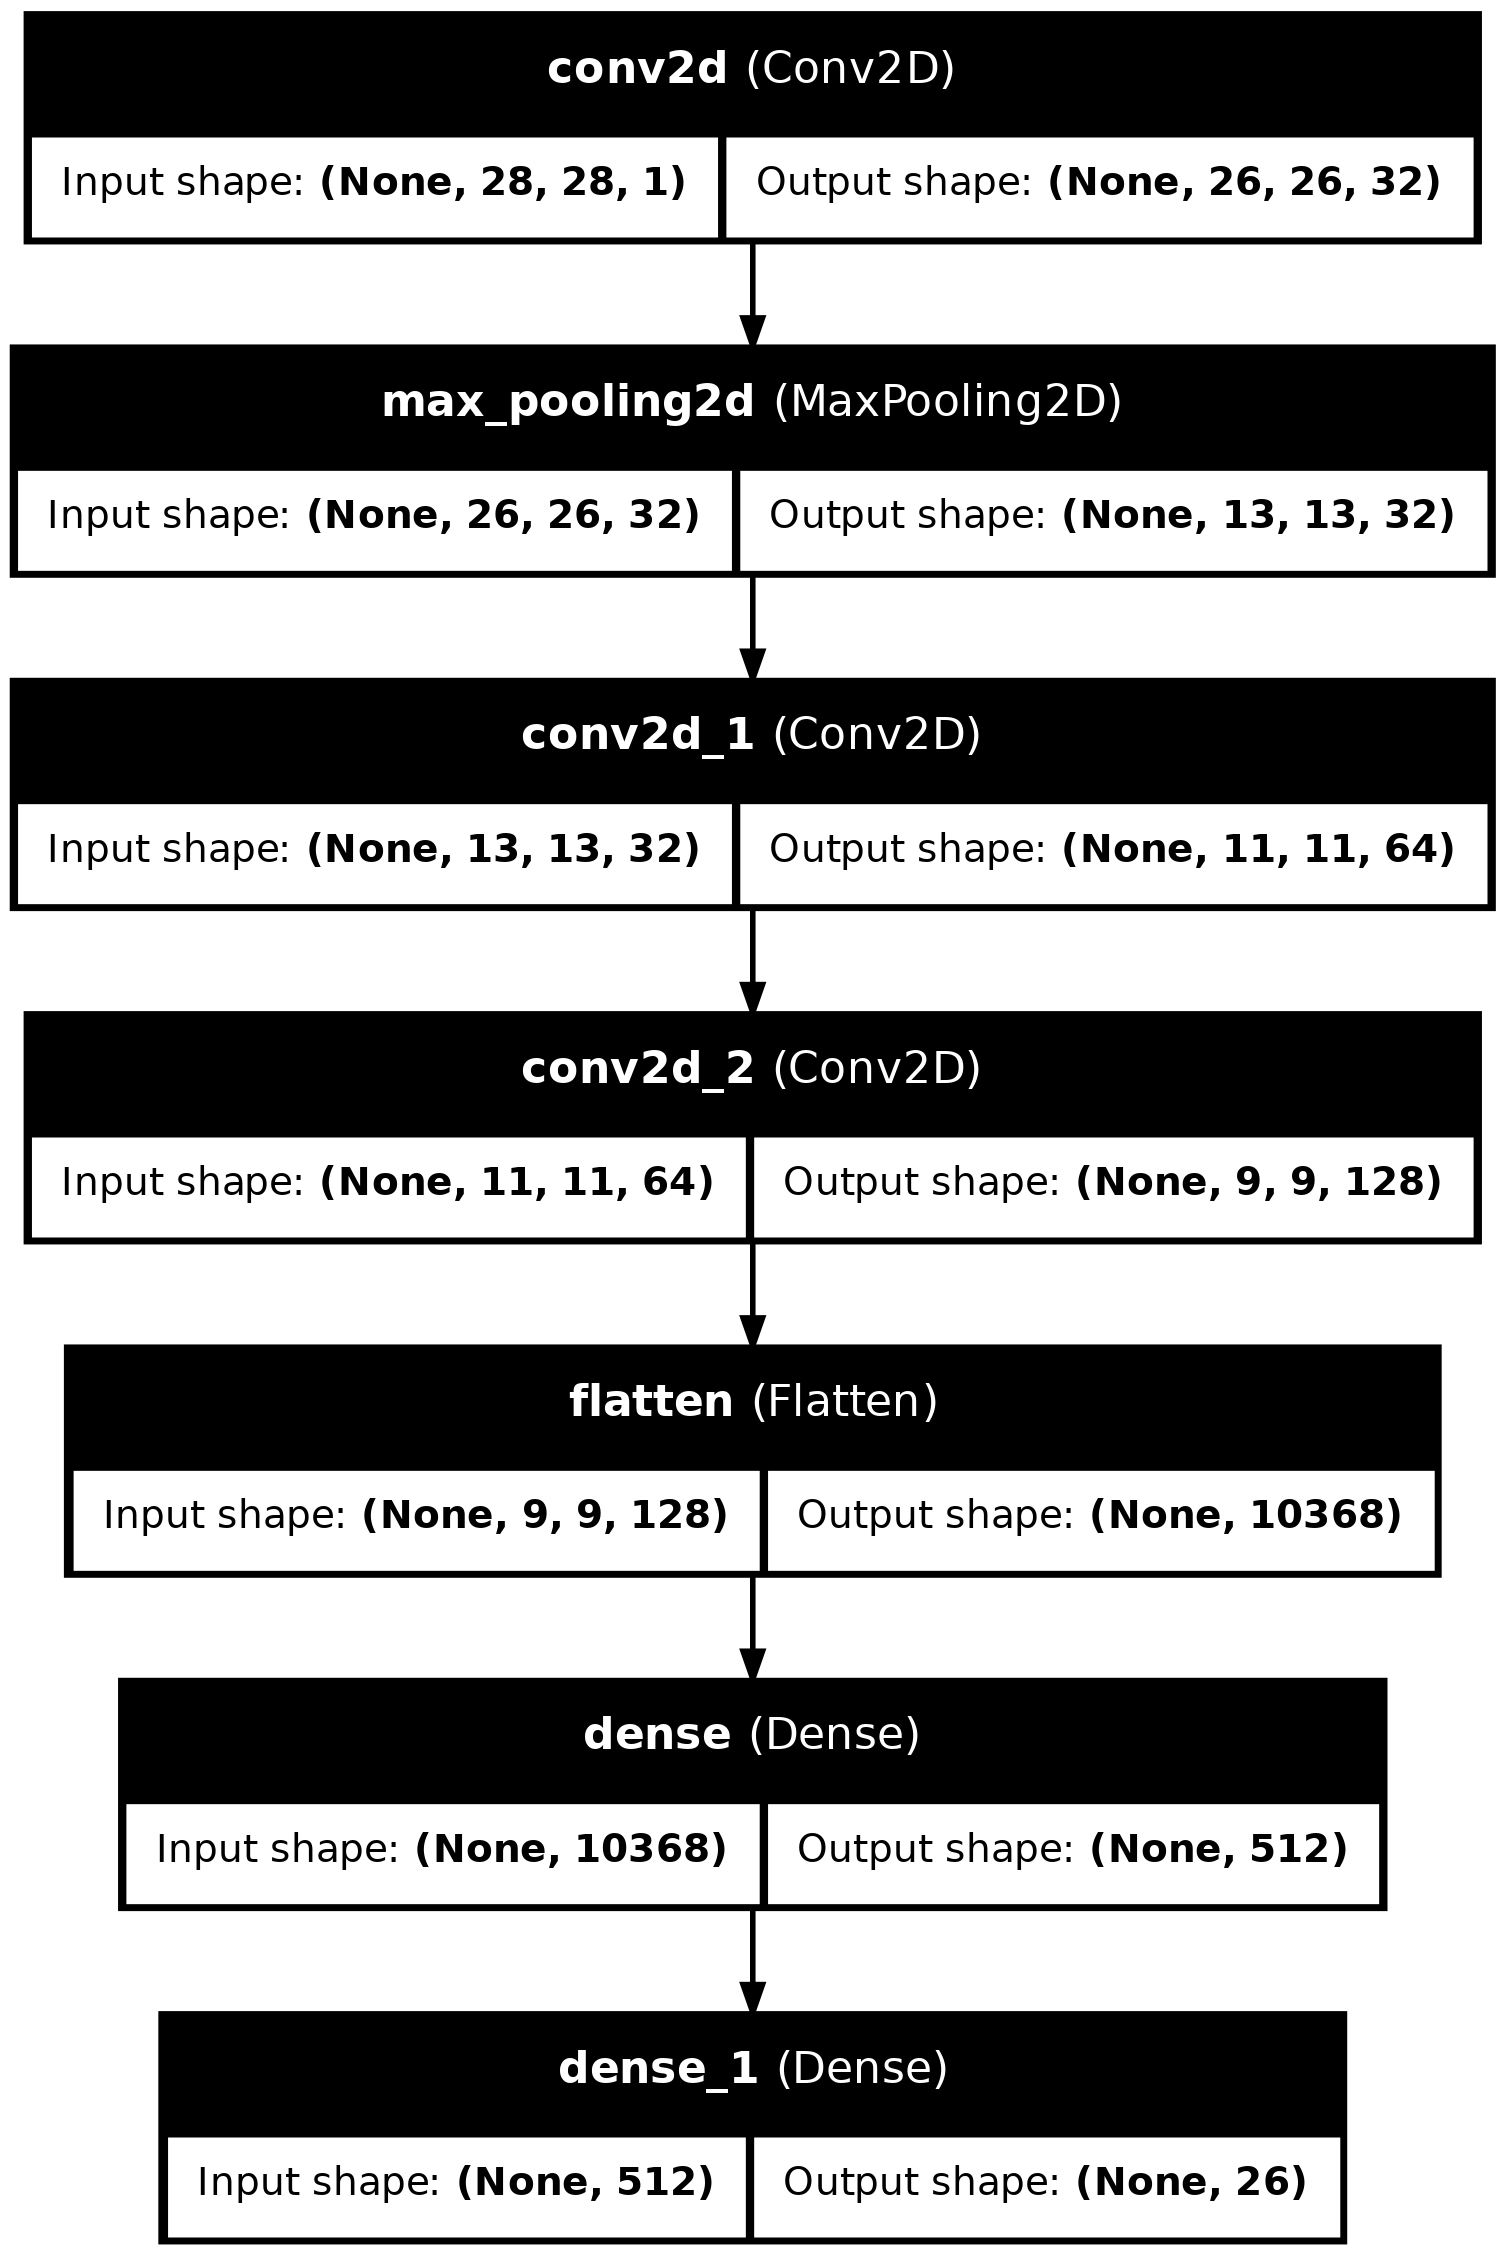

In [9]:
plot_model(model1, to_file='emnist_base.png', show_shapes=True, show_layer_names=True)
